## Get Kaggle Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krakenhaus404","key":"fd796646710cfe35a86fe469e08d9ddf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           5081        178  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12           1507         47  0.9411765        
johnny1994/divorce-rates-data-should-you-get-married            Divorce Rates Data: Should You Get Married?        22KB  2023-01-15 12:49:06            845         32  0.88235295       
rakkesharv/spotify-top-10000-streamed-songs                     Spotif

In [ ]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

100% 1.29G/1.29G [00:19<00:00, 113MB/s] 
100% 1.29G/1.29G [00:19<00:00, 71.0MB/s]


In [ ]:
!unzip amazon-reviews.zip

Archive:  amazon-reviews.zip
  inflating: amazon_review_polarity_csv.tgz  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install yfinance -q
!pip install snscrape
!pip install transformers
!pip install textblob
!pip install tokenizer
!pip install nltk
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.8 MB/s eta 0:00:00
L

## Import Necessary Liraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as graph_obj
import snscrape.modules.twitter as sntwitter

## Get Multiple Stocks

In [ ]:
stock_list = ['TSLA', 'AAPL', 'AMZN', 'NVDA', 'MSFT', 'META']

gather the company stock condition from year 2019 until 2022 using the history function from yfinance library.

In [ ]:
company_histories = {}
for stock in stock_list:
    company_ticker = yf.Ticker(stock)
    history = company_ticker.history(period="3y")
    company_histories[stock] = history
    print(len(history))

757
757
757
757
757
757


convert into csv file

In [ ]:
for stock in stock_list:
    temp_df = company_histories[stock].copy()
    file_name = stock + '_stock_value.csv'
    temp_df.to_csv(file_name, encoding='utf-8')

plot the stock market value using graph object from plotly library. The reason of using this graph is because the graph is more flexible, which means you could see the stock market from any range time that you want (you could change it by slide the bar below the graph).

In [ ]:
for stock in stock_list:
    temp_df = company_histories[stock].copy()

    fig = graph_obj.Figure(data=[graph_obj.Candlestick( x=temp_df.index, open=temp_df["Open"], high=temp_df["High"], low=temp_df["Low"], close=temp_df["Close"],)])

    fig.update_layout( margin=dict(l=20, r=20, t=60, b=20), height=350, paper_bgcolor="LightSteelBlue", title=stock,)

    fig.show()

## Data Preprocessing

training dataset

---



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
# Load the dataset
data = pd.read_csv("train.csv")

# Add column names
data.columns = ['label', 'review', 'description']

# Print the DataFrame
data.head()

,label,review,description
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [ ]:
df = data.head(50000)

In [ ]:
# Define the features and labels
x_train = df['description']
y_train = df['label']

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
x_train = x_train.apply(preprocess_text)

testing dataset

---



In [ ]:
# Load the dataset
data = pd.read_csv("test.csv")

# Add column names
data.columns = ['label', 'review', 'description']

# Print the DataFrame
data.head()

,label,review,description
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [ ]:
# Define the features and labels
x_test = df['description']
y_test = df['label']

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
x_test = x_test.apply(preprocess_text)

## Create Model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert the text into numerical features using CountVectorizer
vect = CountVectorizer()
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

# Train the model using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(x_train_vect, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test_vect)

# Calculate the evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

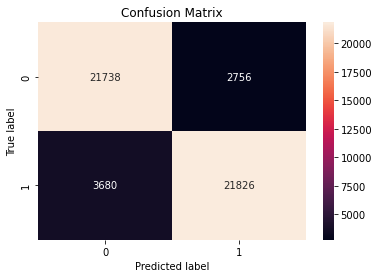

In [ ]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
print('accuracy: ', acc * 100, '%')
print('precision: ', prec * 100, '%')
print('recall: ', recall * 100, '%')
print('f1-score: ', f1 * 100, '%')

accuracy:  87.128 %
precision:  85.522070973326 %
recall:  88.7482648811954 %
f1-score:  87.10530533739382 %


# Sentiment Analysis
analize response from the stock community from twitter about the companies.

The sentiment analysis method will be carried out with the following process:
1. scrape the dataset from twitter from 3/11/2019 until 2/12/2022
2. convert tweet to csv
3. validate null data preprocess the data if exists
4. remove unecessary character that could affect the result
5. analyze the clean tweet data
6. gives the sentiment analysis score using TextBlob and check the score
  - if the score less than equal to 0, the result is negative (because the 0 result is mostly a negative comments).
  - if the score is more than 0, the result is positive

7. plot the analysis result 

Note: the same process was carried out in 6 different companies

## AAPL

In [ ]:
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$AAPL since:2019-11-03 until:2022-12-02").get_items()),total=15000,):  # declare a username
    if i > 15000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)


  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('aapl_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("aapl_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:58:16+00:00,1.598467e+18,$TSLA \n#WINNER\nhttps://t.co/ZBTRgq18CE\nAnot...,Smith28301
1,1,2022-12-01 23:57:34+00:00,1.598466e+18,StableDiffusion can generate an image on Apple...,MacHashNews
2,2,2022-12-01 23:55:08+00:00,1.598466e+18,$BNB $BCH $THETA $TRX $TZX $AMZN $SPY $XVG $DD...,Smith28301
3,3,2022-12-01 23:54:10+00:00,1.598466e+18,This weeks blog talks about this epic tax loss...,Dynamicbrands
4,4,2022-12-01 23:53:59+00:00,1.598465e+18,Top tweeted stocks:\n$TSLA $AAPL $SPX $SNOW $A...,StockmanDuck


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0        tsla winner anoth earli long entri one level ....
1        stablediffus gener imag appl silicon mac 18 se...
2        bnb bch theta trx tzx amzn spi xvg ddtg xlm us...
3        week blog talk epic tax loss sell season remin...
4        top tweet stock : tsla aapl spx snow aehr meta...
                               ...                        
15068                 got littl sell spx spi qqq aapl msft
15069                                 shame aapl say shame
15070    trend : djia aapl -1.89 % nke -0.01 % unh -0.4...
15071    chang charact aapl . unabl reclaim 200sma , ri...
15072                                 short aapl gift morn
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 2 1 ... 1 2 2]


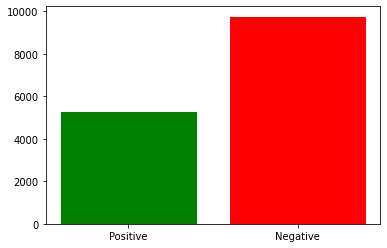

5248
9753


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
#bar_chart.set_title('Apple Tweet Sentiment Result')
plt.show()

print(positive)
print(negative)

## TSLA

In [ ]:
tweets_list = []

for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$TSLA since:2019-11-03 until:2022-12-02").get_items()), total=15000):
    if i > 15000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('tsla_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("tsla_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:59:55+00:00,1.598467e+18,@BeardedTesla @Tesla Yay !! I’m picking mine u...,MICHAEL18964408
1,1,2022-12-01 23:59:40+00:00,1.598467e+18,@Virus_City_ @Tesla @elonmusk Even in the phot...,Gary79699215
2,2,2022-12-01 23:59:40+00:00,1.598467e+18,@TZdisruption @elonmusk @Tesla @WholeMarsBlog ...,TeslaLisa
3,3,2022-12-01 23:59:35+00:00,1.598467e+18,"@klwtts @Tesla @elonmusk That sucks. Elon, why...",PancakesTesla
4,4,2022-12-01 23:59:28+00:00,1.598467e+18,@yusranwatampon1 @Tesla Tesla's naysayers have...,CrisBCT


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0                beardedtesla tesla yay ’ pick mine monday
1        virus_city_ tesla elonmusk even photo see bodi...
2        tzdisrupt elonmusk tesla wholemarsblog rule 'v...
3        klwtt tesla elonmusk suck . elon , ppl get can...
4        yusranwatampon1 tesla tesla 's naysay fake exa...
                               ...                        
15010    brandenflasch rivian cultur , result . thank ,...
15011                                         tsla oh wait
15012    fadequeen77 pryzmrulezz thenewannefrank astral...
15013    pennybritish appl twitter tesla preach glad 'm...
15014         expens premium today .. small put posit tsla
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 2 1 ... 2 2 1]


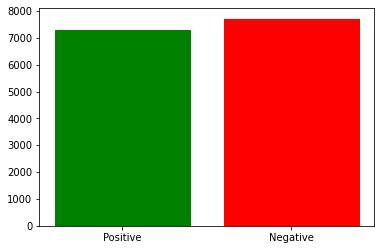

7288
7713


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
plt.show()

print(positive)
print(negative)

## AMZN

In [ ]:
tweets_list = []

for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$AMZN since:2019-11-03 until:2022-12-02").get_items()), total=15000):
    if i > 15000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('amzn_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("amzn_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:56:24+00:00,1.598466e+18,"“Most winning trading community, Get next winn...",Smith28301
1,1,2022-12-01 23:55:08+00:00,1.598466e+18,$BNB $BCH $THETA $TRX $TZX $AMZN $SPY $XVG $DD...,Smith28301
2,2,2022-12-01 23:54:10+00:00,1.598466e+18,This weeks blog talks about this epic tax loss...,Dynamicbrands
3,3,2022-12-01 23:53:59+00:00,1.598465e+18,Top tweeted stocks:\n$TSLA $AAPL $SPX $SNOW $A...,StockmanDuck
4,4,2022-12-01 23:53:47+00:00,1.598465e+18,$AAPL Trade idea💡\nhttps://t.co/ZBTRgq18CE\n\n...,Smith28301


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0        “ win trade commun , get next win alert : spi ...
1        bnb bch theta trx tzx amzn spi xvg ddtg xlm us...
2        week blog talk epic tax loss sell season remin...
3        top tweet stock : tsla aapl spx snow aehr meta...
4        aapl trade idea : light_bulb : amc spi gme qqq...
                               ...                        
15066           amzn `` top analyst price target next week
15067    stock ath : amzn -54 % baba -75 % bynd -94 % c...
15068        netflix : de-faang , bargain di amzn wbd nflx
15069    stock ath : amzn -54 % baba -75 % bynd -94 % c...
15070    hit : red_heart : need free alert close . spi ...
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 1 1 ... 1 1 1]


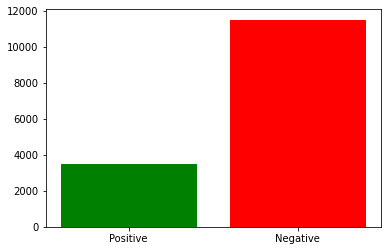

3501
11500


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
plt.show()

print(positive)
print(negative)

## NVDA

In [ ]:
tweets_list = []

for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$NVDA since:2019-11-03 until:2022-12-02").get_items()), total=15000):
    if i > 15000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('nvda_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("nvda_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:58:16+00:00,1.598467e+18,$TSLA \n#WINNER\nhttps://t.co/ZBTRgq18CE\nAnot...,Smith28301
1,1,2022-12-01 23:57:43+00:00,1.598466e+18,@StockMKTNewz Your Best Buy is $NVDA. You boug...,Meiyubense
2,2,2022-12-01 23:56:24+00:00,1.598466e+18,"“Most winning trading community, Get next winn...",Smith28301
3,3,2022-12-01 23:53:59+00:00,1.598465e+18,Top tweeted stocks:\n$TSLA $AAPL $SPX $SNOW $A...,StockmanDuck
4,4,2022-12-01 23:51:50+00:00,1.598465e+18,https://t.co/ZBTRgq18CE\nJoin now\n$TSLA $NVDA...,Smith28301


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0        tsla winner anoth earli long entri one level ....
1        stockmktnewz best buy nvda . bought right time...
2        “ win trade commun , get next win alert : spi ...
3        top tweet stock : tsla aapl spx snow aehr meta...
4        join tsla nvda mu amzn msft baba nflx adb axp ...
                               ...                        
15128    shop hold 36.80 level watch move back toward 3...
15129    aapl keep eye downtrend break move toward 155 ...
15130    cathi wood buy 3 million share dna plung sell ...
15131    live day-trad room , free access room get live...
15132    spi held 390 zone today put bounc back near 39...
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 2 2 ... 1 1 1]


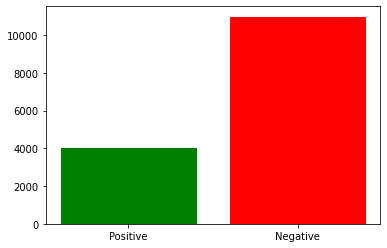

4022
10979


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
plt.show()

print(positive)
print(negative)

## MSFT

In [ ]:
tweets_list = []

for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$MSFT since:2019-11-03 until:2022-12-02").get_items()), total=15000):
    if i > 15000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('msft_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("msft_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:53:59+00:00,1.598465e+18,Top tweeted stocks:\n$TSLA $AAPL $SPX $SNOW $A...,StockmanDuck
1,1,2022-12-01 23:53:47+00:00,1.598465e+18,$AAPL Trade idea💡\nhttps://t.co/ZBTRgq18CE\n\n...,Smith28301
2,2,2022-12-01 23:51:50+00:00,1.598465e+18,https://t.co/ZBTRgq18CE\nJoin now\n$TSLA $NVDA...,Smith28301
3,3,2022-12-01 23:50:14+00:00,1.598465e+18,$AMD $AAPL $SQ $AMZN \n$EA $SEDG $MA $V $KO $P...,SheldonKooper7
4,4,2022-12-01 23:49:24+00:00,1.598464e+18,Learn To Trade While You're Working From Home&...,Smith28301


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0        top tweet stock : tsla aapl spx snow aehr meta...
1        aapl trade idea : light_bulb : amc spi gme qqq...
2        join tsla nvda mu amzn msft baba nflx adb axp ...
3        amd aapl sq amzn ea sedg v ko pypl rcl goog nk...
4        learn trade 're work home & gt ; aapl amzn btc...
                               ...                        
15019    msft : dollar_banknot : :money-mouth_fac : pro...
15020    : green_circl : videogam maker bounc back 2022...
15021    today 's market heatmap - novemb 16 tgt -16.19...
15022                     msft put st240 وقف اختراق 244.65
15023                        aiというワードにほんと期待するもんだね、市場は msft
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 1 1 ... 1 1 2]


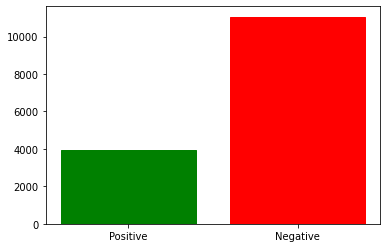

3943
11058


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
plt.show()

print(positive)
print(negative)

## META

In [ ]:
tweets_list = []

for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f"$META since:2019-11-03 until:2022-12-02").get_items()), total=15000):
    if i > 15000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
tweet_df.to_csv('meta_tweet.csv', encoding='utf-8')

In [ ]:
# Load the dataset
tweet_df = pd.read_csv("meta_tweet.csv")
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-12-01 23:58:46+00:00,1.598467e+18,@Reyhaneh @Meta @plfmse @IllinoisCS Thank you ...,LingmingZhang
1,1,2022-12-01 23:56:04+00:00,1.598466e+18,@LingmingZhang @Meta @plfmse @IllinoisCS 🎉🎉🎉,Reyhaneh
2,2,2022-12-01 23:55:55+00:00,1.598466e+18,Just found out my Meta Quest is bricked\n\nTha...,Mylodi_
3,3,2022-12-01 23:54:52+00:00,1.598466e+18,Today's update. Good afternoon. Hoping @Meta-b...,MsElephantGun
4,4,2022-12-01 23:54:48+00:00,1.598466e+18,Instead of responding (see previous) @Meta-boo...,MsElephantGun


In [ ]:
dataset = tweet_df['Text']
dataset = dataset.dropna()
dataset = dataset.astype(str)

# Define the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    # remove stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # perform stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
dataset = dataset.apply(lambda x: x.replace("#", ""))
dataset = dataset.apply(lambda x: x.replace("$", ""))
dataset = dataset.apply(lambda x: x.replace("@", ""))
dataset = dataset.apply(lambda x: x.replace("!", ""))
dataset = dataset.apply(lambda x: re.sub(r'http\S+', '', x))
dataset = dataset.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if not any(letter in word for letter in "#@")]))

In [ ]:
import emoji
def convert_emoji_to_word(text):
    return emoji.demojize(text)

dataset = dataset.apply(lambda x: convert_emoji_to_word(x))

In [ ]:
dataset = dataset.apply(preprocess_text)
dataset

0              reyhaneh meta plfmse illinoisc thank reyhan
1        lingmingzhang meta plfmse illinoisc : party_po...
2        found meta quest brick thank wors actual garba...
3        today 's updat . good afternoon . hope meta-bo...
4        instead respond ( see previou ) meta-book deci...
                               ...                        
15174    oh look , meta tax file site collect person in...
15175    sandip97922651 facebook meta till : disappoint...
15176    rumor mark zuckerberg leav meta greener pastur...
15177                              meta - 111 - see nhod .
15178    instagramcomm still fix . ridicul . three plu ...
Name: Text, Length: 15001, dtype: object

In [ ]:
# Convert the text into numerical features using the same CountVectorizer as the training data
new_data_vect = vect.transform(dataset)

# Make predictions on the new data
predictions = clf.predict(new_data_vect)

# Print the predictions
print(predictions)

[2 2 1 ... 2 1 1]


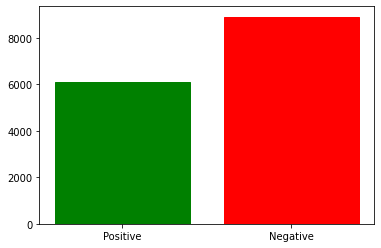

6098
8903


In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive = len([p for p in predictions if p == 2])
negative = len([p for p in predictions if p == 1])

# Create a bar chart
bar_chart = plt.bar(['Positive', 'Negative'], [positive, negative])
bar_chart[0].set_color('g')
bar_chart[1].set_color('r')
plt.show()

print(positive)
print(negative)